## Import Modules

In [165]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

## Load Images

In [2]:
base_dir = '.\data'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [6]:
def loadDataFromDir(root_dir):
    print('=====| Start Load from "{0}" |====='.format(root_dir))
    result_data, result_label = [], []

    cnt = 0
    labels = os.listdir(root_dir)   # 'train' or 'test' 내 Label List
    print('- Label List: {0}'.format(labels))
    for label in labels:
        label_root = os.path.join(root_dir, label)  # Label File Foot
        file_list = os.listdir(label_root)          # Label Image Name List
        print(' -> Load {0}( {1:5d} )'.format(label, len(file_list)), end='')
        for file_name in file_list:
            file_path = os.path.join(label_root, file_name)
            img = Image.open(file_path)

            result_data.append(np.array(img))
            result_label.append(int(label))
            if cnt%200 == 0:
                print('.', end='')
            cnt += 1
        print('Done.')
    
    result_data, result_label = np.array(result_data), np.array(result_label)

    return result_data, result_label 

In [7]:
test_data, test_label = loadDataFromDir(test_dir)

=====| Start Load from ".\data\test" |=====
- Label List: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
 -> Load 0(   980 ).....Done.
 -> Load 1(  1135 )......Done.
 -> Load 2(  1032 ).....Done.
 -> Load 3(  1010 ).....Done.
 -> Load 4(   982 ).....Done.
 -> Load 5(   892 ).....Done.
 -> Load 6(   958 )....Done.
 -> Load 7(  1028 )......Done.
 -> Load 8(   974 )....Done.
 -> Load 9(  1009 ).....Done.


In [8]:
train_data, train_label = loadDataFromDir(train_dir)

=====| Start Load from ".\data\train" |=====
- Label List: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
 -> Load 0(  5923 )..............................Done.
 -> Load 1(  6742 )..................................Done.
 -> Load 2(  5958 )..............................Done.
 -> Load 3(  6131 )..............................Done.
 -> Load 4(  5842 ).............................Done.
 -> Load 5(  5421 )............................Done.
 -> Load 6(  5918 ).............................Done.
 -> Load 7(  6265 )...............................Done.
 -> Load 8(  5851 )..............................Done.
 -> Load 9(  5949 ).............................Done.


In [9]:
print('=====| Loaded Datas |=====')
print('- Train Data\t: {0}'.format(train_data.shape))
print('- Train Label\t: {0}'.format(train_label.shape))
print('- Test Data\t: {0}'.format(test_data.shape))
print('- Test Label\t: {0}'.format(test_label.shape))

=====| Loaded Datas |=====
- Train Data	: (60000, 28, 28)
- Train Label	: (60000,)
- Test Data	: (10000, 28, 28)
- Test Label	: (10000,)


## Perceptron

### Functions

In [261]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def MSE(y, y_hat):
    return np.mean((y-y_hat)**2)

def gradient(x, y, y_hat):
    nb_data = len(x)
    return 2/nb_data * x.T.dot(y_hat-y)

### Model

In [262]:
class Perceptron:
    def __init__(self, nb_input, act_func):
        self.nb_input = nb_input
        self.weights = np.random.random(self.nb_input)
        self.bias = random.random()
        self.act_func = act_func
        self.history = []
    
    def shape(self):
        print('=====| Perceptron Shape |=====')
        # print('- input shape\n :', self.nb_input)
        print('- weights\n :', self.weights)
        # print('- bias\n :',self.bias)

    def predict(self, x_data):
        y = x_data.dot(self.weights)
        return y

    def train(self, x_data, y_data, loss_func, learning_rate, epochs):
        nb_data = len(y_data)

        for epoch in range(epochs):
            y_hat = x_data.dot(self.weights)
            
            loss = loss_func(y_data, y_hat)
            gradients = gradient(x_data, y_data, y_hat)
            
            self.history.append(loss)
            self.weights = self.weights - learning_rate*gradients
            # if epoch%1000 == 0: print('[{0:4} Epoch ]\n - Loss: {1:06.4f}'.format(epoch, loss))

### Create

In [263]:
input_x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
input_y = np.array([1, 1, 1, 0])

perceptron = Perceptron(2, sigmoid)

### Train

In [264]:
lr = 0.0001
epochs = 100000
perceptron.train(input_x, input_y, MSE, lr, epochs)

### Loss Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

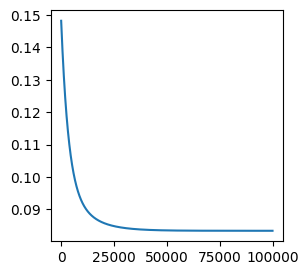

In [266]:
hist = perceptron.history

plt.figure(figsize=(3, 3))
plt.plot(hist)
plt.show